In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [2]:
import numpy as np
import torch
import torch.nn as nn

# Generate synthetic data: y = 2x + 1 + noise
np.random.seed(0)
X = np.random.rand(100, 1)  # 100 random input points
Y = 2*X + 1 + 0.1*np.random.randn(100, 1)  # Linear relationship with noise

# Convert NumPy arrays to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

class SimpleLinearModel(nn.Module):
    """Linear regression model: y = wx + b"""
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x):
        return self.linear(x)

# Initialize model and training parameters
model = SimpleLinearModel()
loss_fn = nn.MSELoss()  # Mean Squared Error loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent

# Training loop
epochs = 100
for epoch in range(epochs):
    # Forward pass
    predictions = model(X)
    loss = loss_fn(predictions, Y)
    
    # Backward pass
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()       # Compute gradients
    optimizer.step()      # Update weights
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Save model
torch.save(model.state_dict(), 'linear_model.pth')

Epoch 0, Loss: 3.7590
Epoch 10, Loss: 0.2491
Epoch 20, Loss: 0.1837
Epoch 30, Loss: 0.1426
Epoch 40, Loss: 0.1112
Epoch 50, Loss: 0.0872
Epoch 60, Loss: 0.0689
Epoch 70, Loss: 0.0550
Epoch 80, Loss: 0.0443
Epoch 90, Loss: 0.0362


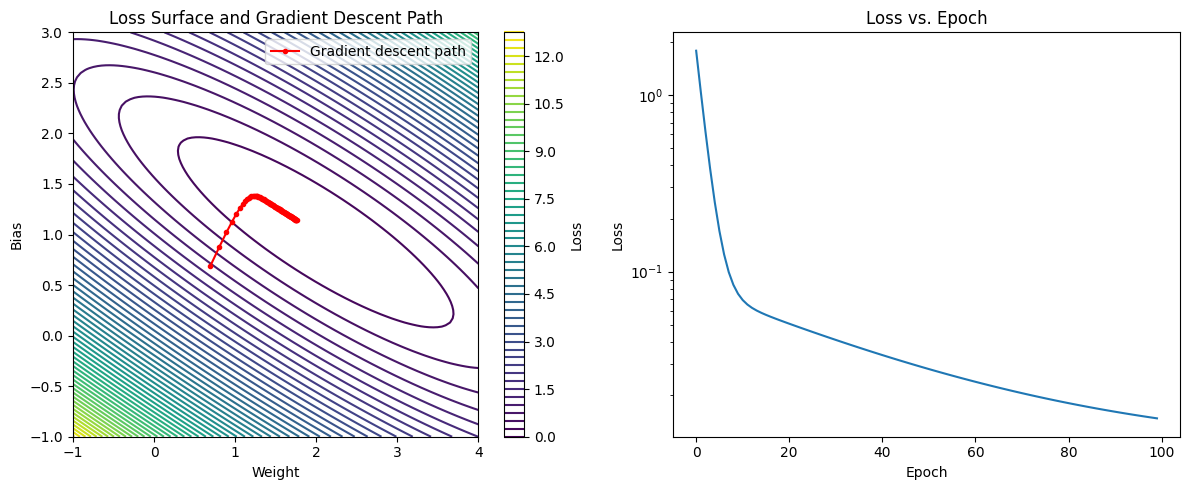

In [3]:
import matplotlib.pyplot as plt

# Create parameter space for visualization
w = np.linspace(-1, 4, 100)
b = np.linspace(-1, 3, 100)
W, B = np.meshgrid(w, b)

# Calculate loss surface
Z = np.zeros_like(W)
for i in range(len(w)):
   for j in range(len(b)):
       pred = W[i,j] * X.numpy() + B[i,j]
       Z[i,j] = np.mean((pred - Y.numpy())**2)

# Initialize model and parameters for tracking
model = SimpleLinearModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
w_history = []
b_history = []
loss_history = []

# Training loop with parameter tracking
for epoch in range(100):
   predictions = model(X)
   loss = loss_fn(predictions, Y)
   
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()
   
   # Store parameters
   w = model.linear.weight.item()
   b = model.linear.bias.item()
   w_history.append(w)
   b_history.append(b)
   loss_history.append(loss.item())

# Visualize the gradient descent
plt.figure(figsize=(12, 5))

# Loss surface contour plot
plt.subplot(121)
plt.contour(W, B, Z, levels=50)
plt.colorbar(label='Loss')
plt.plot(w_history, b_history, 'r.-', label='Gradient descent path')
plt.xlabel('Weight')
plt.ylabel('Bias')
plt.title('Loss Surface and Gradient Descent Path')
plt.legend()

# Loss vs Epoch plot
plt.subplot(122)
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.yscale('log')

plt.tight_layout()
plt.show()

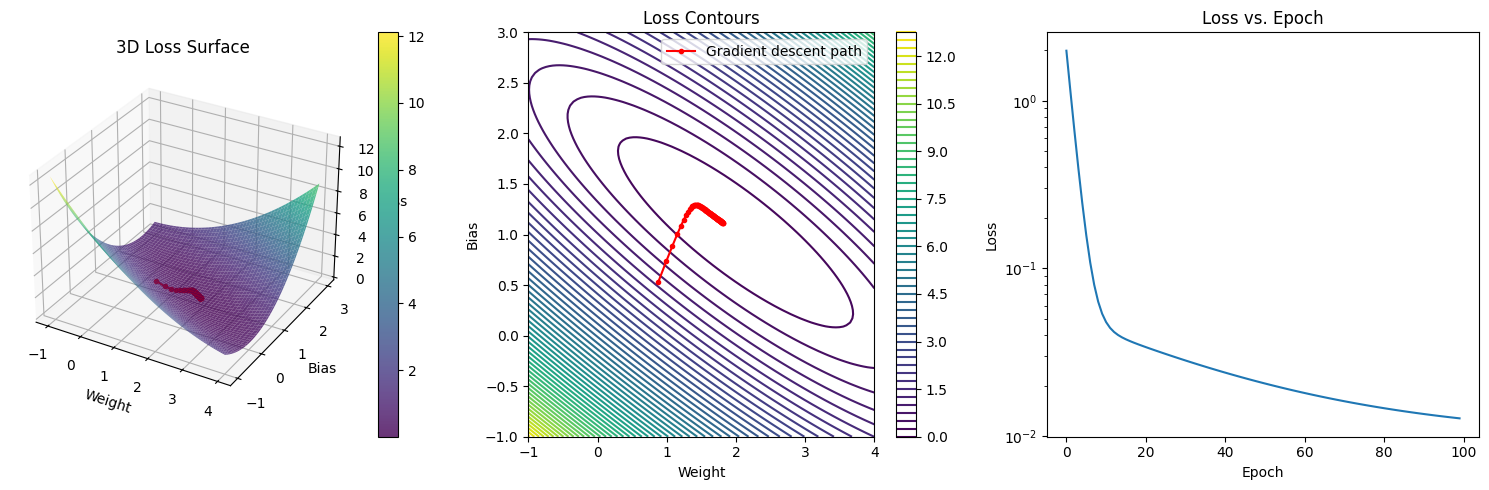

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create parameter space and calculate loss surface
w = np.linspace(-1, 4, 100)
b = np.linspace(-1, 3, 100)
W, B = np.meshgrid(w, b)
Z = np.zeros_like(W)
for i in range(len(w)):
   for j in range(len(b)):
       pred = W[i,j] * X.numpy() + B[i,j]
       Z[i,j] = np.mean((pred - Y.numpy())**2)

# Training loop
model = SimpleLinearModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
w_history = []
b_history = []
loss_history = []

for epoch in range(100):
   predictions = model(X)
   loss = loss_fn(predictions, Y)
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()
   
   w_history.append(model.linear.weight.item())
   b_history.append(model.linear.bias.item())
   loss_history.append(loss.item())

# 3D Visualization
fig = plt.figure(figsize=(15, 5))

# 3D Surface plot
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(W, B, Z, cmap='viridis', alpha=0.8)
ax1.plot(w_history, b_history, loss_history, 'r.-', label='Gradient descent path')
ax1.set_xlabel('Weight')
ax1.set_ylabel('Bias')
ax1.set_zlabel('Loss')
ax1.set_title('3D Loss Surface')
fig.colorbar(surf)

# Contour plot
ax2 = fig.add_subplot(132)
contour = ax2.contour(W, B, Z, levels=50)
ax2.plot(w_history, b_history, 'r.-', label='Gradient descent path')
ax2.set_xlabel('Weight')
ax2.set_ylabel('Bias')
ax2.set_title('Loss Contours')
plt.colorbar(contour)
ax2.legend()

# Loss history
ax3 = fig.add_subplot(133)
ax3.plot(loss_history)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')
ax3.set_yscale('log')
ax3.set_title('Loss vs. Epoch')

plt.tight_layout()
plt.show()

In [9]:
import plotly.graph_objects as go

# Create more intuitive axes ranges
w = np.linspace(-1, 4, 50)
b = np.linspace(-1, 3, 50)
W, B = np.meshgrid(w, b)
Z = np.zeros_like(W)

# Calculate loss surface
for i in range(len(w)):
    for j in range(len(b)):
        pred = W[i,j] * X.numpy() + B[i,j]
        Z[i,j] = np.mean((pred - Y.numpy())**2)

# Create interactive 3D plot
fig = go.Figure()

# Add surface with better transparency
fig.add_trace(go.Surface(
    x=W, y=B, z=Z,
    colorscale='Viridis',
    opacity=0.8,
    showscale=True,
    colorbar=dict(title='Loss Value')
))

# Add gradient descent path with clear markers
fig.add_trace(go.Scatter3d(
    x=w_history,
    y=b_history,
    z=loss_history,
    mode='lines+markers',
    line=dict(color='red', width=5),
    marker=dict(
        size=6,
        color=list(range(len(w_history))),
        colorscale='Reds',
        showscale=True,
        colorbar=dict(title='Epoch')
    ),
    name='Gradient Descent Path'
))

# Update layout for better visibility
fig.update_layout(
    title='Loss Landscape and Gradient Descent Path',
    scene=dict(
        xaxis_title='Weight',
        yaxis_title='Bias',
        zaxis_title='Loss',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.2),
            up=dict(x=0, y=0, z=1)
        )
    ),
    showlegend=True,
    width=800,
    height=800
)

fig.show()